In [2]:
import pandas as pd

# Load adult.data
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
adult_data = pd.read_csv('adult.data', names=columns, na_values=' ?', skipinitialspace=True)

# Load adult.test
adult_test = pd.read_csv('adult.test', names=columns, na_values=' ?', skipinitialspace=True, skiprows=1) 

adult_test.loc[:, 'income'] = adult_test['income'].replace(regex=True, to_replace=r'\.', value=r'')
# Combine both datasets
Data_set = pd.concat([adult_data, adult_test], ignore_index=True)
Data_set.reset_index(drop=True,inplace=True)
Data_set

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [4]:
print("No of rows in dataset before preprocessing : ", len(Data_set))

No of rows in dataset before preprocessing :  48842


In [6]:
# Count the class labels
class_counts = Data_set['income'].value_counts()

# Display the class counts
print("Class Counts:")
print(class_counts)


Class Counts:
income
<=50K    37155
>50K     11687
Name: count, dtype: int64


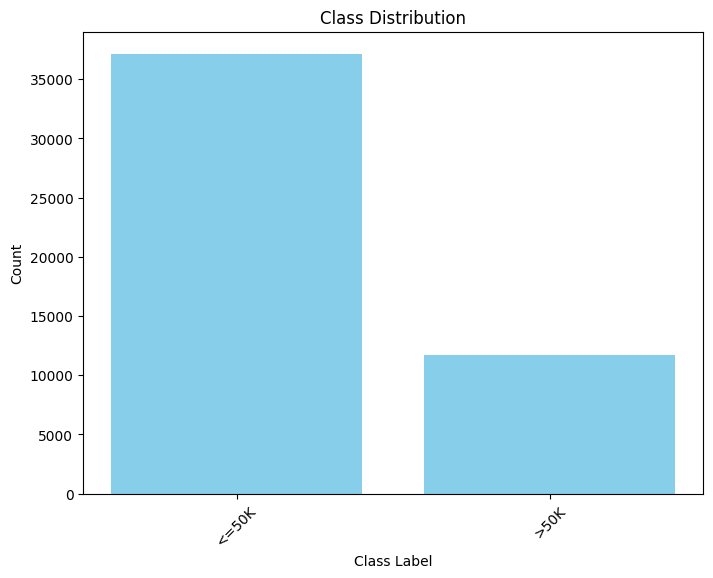

In [7]:
import matplotlib.pyplot as plt

# Count the class labels
class_counts = Data_set['income'].value_counts()

# Visualize class distribution
plt.figure(figsize=(8, 6))
plt.bar(class_counts.index, class_counts.values, color='skyblue')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


### Find duplicates

In [78]:
Data_set.duplicated().values.any()

True

In [79]:
# Drop duplicates
Data_set_no_duplicates = Data_set.drop_duplicates()
Data_set_no_duplicates

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [80]:
print("No of rows in dataset after removing duplicates : ", len(Data_set_no_duplicates))

No of rows in dataset after removing duplicates :  48790


### Finding null values

In [81]:
# Find rows containing '?'
null_values = Data_set_no_duplicates.isin(['?']).any(axis=1)

# Count the number of rows with '?'
no_null_values = null_values.sum()
print("Number of rows containing '?' before dropping:", no_null_values)



Number of rows containing '?' before dropping: 3615


### Dropping null values

In [82]:
# Drop rows with '?'
null_df2 = Data_set_no_duplicates[~null_values]

# Reset index after drop
no_null_df2 = null_df2.dropna().reset_index(drop=True)

# Check the number of rows after dropping
print("Number of rows in dataset after dropping rows with '?':", len(no_null_df2))

no_null_df2

Number of rows in dataset after dropping rows with '?': 45175


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45170,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
45171,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
45172,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
45173,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


### Summary of the dataset

In [112]:
# Statistical summary of numerical features
print("\nStatistical summary of numerical features:")
(no_null_df2.describe())


Statistical summary of numerical features:


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,45175.000000,4.517500e+04,45175.000000,45175.000000,45175.000000,45175.000000
mean,38.556170,1.897388e+05,10.119314,1102.576270,88.687593,40.942512
std,13.215349,1.056524e+05,2.551740,7510.249876,405.156611,12.007730
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173925e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783120e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379030e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [113]:
# Summary of categorical features
print("\nSummary of categorical features:")
(no_null_df2.describe(include=['object']))


Summary of categorical features:


,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,45175,45175,45175,45175,45175,45175,45175,45175,45175
unique,7,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K
freq,33262,14770,21042,6010,18653,38859,30495,41256,33973


### Standard deviation and mean before standard scalar

Standard Deviation of each numeric column:
age                   13.215349
fnlwgt            105652.436515
education-num          2.551740
capital-gain        7510.249876
capital-loss         405.156611
hours-per-week        12.007730
dtype: float64


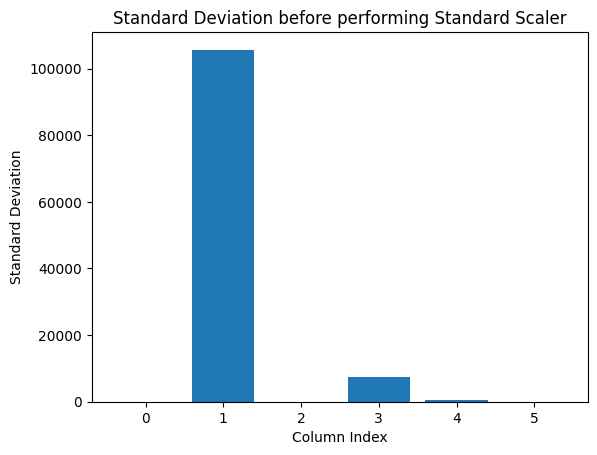

In [86]:
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_columns = no_null_df2.select_dtypes(include=['int64', 'float64'])

# Calculate the standard deviation of numeric columns
std_deviation_numeric = numeric_columns.std()

# Display the standard deviation for each numeric column
print("Standard Deviation of each numeric column:")
print(std_deviation_numeric)

plt.bar(range(len(std_deviation_numeric)), std_deviation_numeric)
plt.title("Standard Deviation before performing Standard Scaler")
plt.xlabel("Column Index")
plt.ylabel("Standard Deviation")
plt.show()


Mean of each numeric column:
age                   38.556170
fnlwgt            189738.798450
education-num         10.119314
capital-gain        1102.576270
capital-loss          88.687593
hours-per-week        40.942512
dtype: float64


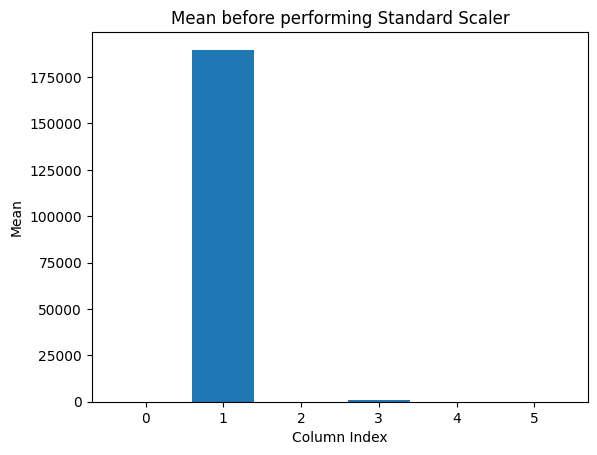

In [87]:
# Calculate the mean of numeric columns
mean_values = numeric_columns.mean()

# Display the mean for each numeric column
print("Mean of each numeric column:")
print(mean_values)

# Plot the mean of all columns
plt.bar(range(len(mean_values)), mean_values)
plt.title("Mean before performing Standard Scaler")
plt.xlabel("Column Index")
plt.ylabel("Mean")
plt.show()

In [88]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numeric columns using StandardScaler
scaled_data = scaler.fit_transform(no_null_df2.select_dtypes(include=['int64', 'float64']))

# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=no_null_df2.select_dtypes(include=['int64', 'float64']).columns)

# Reset index of df2
no_null_df2.reset_index(drop=True, inplace=True)

# Concatenate the scaled numeric columns with non-numeric columns
final_scaled_data = pd.concat([scaled_df, no_null_df2.select_dtypes(exclude=['int64', 'float64']).reset_index(drop=True)], axis=1)

# Display the dataset after standard scaling
print("Dataset after standard scaling:")
(final_scaled_data)


Dataset after standard scaling:


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,0.033585,-1.062200,1.128923,0.142663,-0.218899,-0.078493,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,0.865959,-1.007350,1.128923,-0.146811,-0.218899,-2.327069,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,-0.042086,0.245214,-0.438652,-0.146811,-0.218899,-0.078493,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,1.092971,0.425761,-1.222440,-0.146811,-0.218899,-0.078493,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,-0.798790,1.407179,1.128923,-0.146811,-0.218899,-0.078493,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45170,-0.420438,0.525050,1.128923,-0.146811,-0.218899,-0.078493,Private,Bachelors,Never-married,Prof-specialty,Own-child,White,Male,United-States,<=50K
45171,0.033585,0.243066,1.128923,-0.146811,-0.218899,-0.411615,Private,Bachelors,Divorced,Prof-specialty,Not-in-family,White,Female,United-States,<=50K
45172,-0.042086,1.753355,1.128923,-0.146811,-0.218899,0.754313,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
45173,0.411937,-1.001860,1.128923,0.579538,-0.218899,-0.078493,Private,Bachelors,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,United-States,<=50K


### Mean and standard deviation after standard scalar

In [89]:
# Selecting numerical columns for which we want to calculate mean and standard deviation
numerical_columns = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Calculate mean and standard deviation of each feature in the scaled numerical columns
mean_values = scaled_df[numerical_columns].mean()
std_values = scaled_df[numerical_columns].std()

# Display mean and standard deviation of each feature
print("Mean values of each feature after standard scaling:")
print(mean_values)
print("\nStandard deviation of each feature after standard scaling:")
print(std_values)


Mean values of each feature after standard scaling:
age               1.509952e-17
fnlwgt           -1.410862e-16
education-num    -2.878347e-17
capital-gain     -5.347748e-18
capital-loss      1.132464e-17
hours-per-week   -9.201273e-17
dtype: float64

Standard deviation of each feature after standard scaling:
age               1.000011
fnlwgt            1.000011
education-num     1.000011
capital-gain      1.000011
capital-loss      1.000011
hours-per-week    1.000011
dtype: float64


### Mean after standard scalar

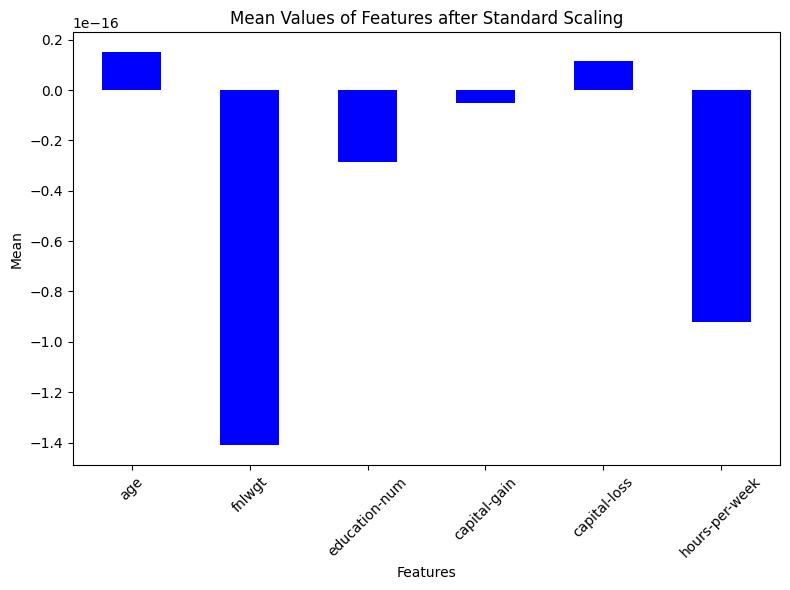

In [109]:
import matplotlib.pyplot as plt

# Plot mean values
plt.figure(figsize=(8, 6))
mean_values.plot(kind='bar', color='blue')
plt.title('Mean Values of Features after Standard Scaling')
plt.xlabel('Features')
plt.ylabel('Mean')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Standard deviation after standard scalar

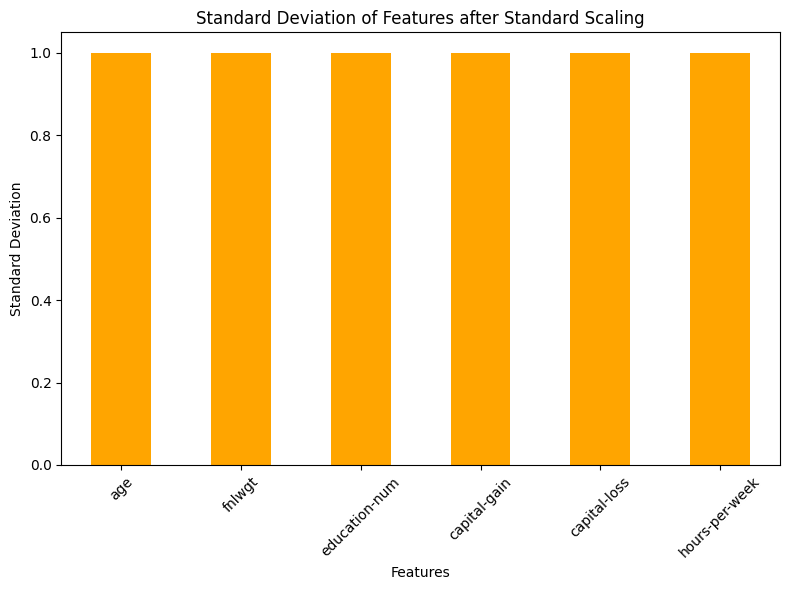

In [110]:
# Plot standard deviation values
plt.figure(figsize=(8, 6))
std_values.plot(kind='bar', color='orange')
plt.title('Standard Deviation of Features after Standard Scaling')
plt.xlabel('Features')
plt.ylabel('Standard Deviation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Building predictive model using Random Forest

### Split into train and test 

In [96]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

# Identify the features (X) and target variable (y)
X = final_scaled_data.drop('income', axis=1)
y = final_scaled_data['income']

# One-hot encode categorical features
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
X_categorical = pd.get_dummies(X[categorical_columns], drop_first=True)

# Concatenate one-hot encoded features with the numeric features
X_encoded = pd.concat([X.drop(categorical_columns, axis=1), X_categorical], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
# Display the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (36140, 96)
Shape of X_test: (9035, 96)
Shape of y_train: (36140,)
Shape of y_test: (9035,)


### Fit the classifier into training set

In [100]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

rf_classifier.fit(X_train,y_train)

y_test_pred = rf_classifier.predict(X_test)

In [99]:
# Assuming you have scikit-learn installed, you can use metrics for evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

classification_rep = classification_report(y_test, y_test_pred)
print('\nClassification Report:')
print(classification_rep)


Classification Report:
              precision    recall  f1-score   support

       <=50K       0.89      0.92      0.90      6830
        >50K       0.72      0.65      0.68      2205

    accuracy                           0.85      9035
   macro avg       0.81      0.78      0.79      9035
weighted avg       0.85      0.85      0.85      9035



### Accuracy on the test set

In [101]:
from sklearn.metrics import accuracy_score

# Make predictions on the test set
y_test_pred = rf_classifier.predict(X_test)

accuracy_score(y_test, y_test_pred)

0.8532374100719424

In [102]:
y_train_pred = rf_classifier.predict(X_train)
accuracy_score(y_train,y_train_pred)

0.9998893193137798

### Confusion Matrix

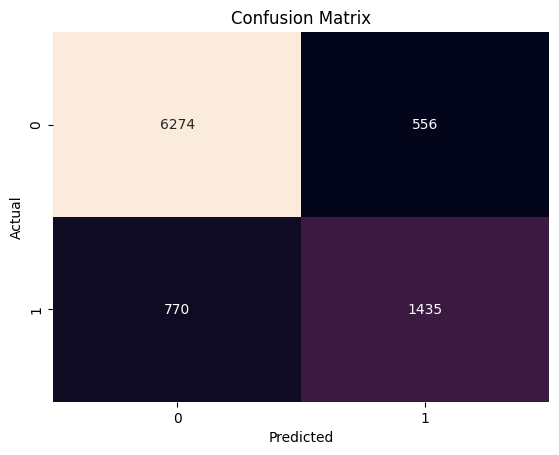

In [103]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix on the test set
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Create a heatmap for the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
